In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="darkgrid")

In [4]:
data = pd.read_pickle('cleaned_data.pkl')

In [5]:
data.dtypes

gender                                 int64
SeniorCitizen                          int64
Partner                                int64
Dependents                             int64
tenure                                 int64
MultipleLines                          int64
InternetService                       object
OnlineSecurity                         int64
OnlineBackup                           int64
DeviceProtection                       int64
TechSupport                            int64
StreamingTV                            int64
StreamingMovies                        int64
Contract                              object
PaperlessBilling                       int64
PaymentMethod                         object
MonthlyCharges                       float64
TotalCharges                         float64
Churn                                  int64
HasPhoneService                        int64
HasInternetService                     int64
InternetService_DSL                    uint8
InternetSe

In [99]:
cat_cols = []
for c in data.columns:
    if len(data[c].value_counts().index) == 2 and c != 'Churn':
        cat_cols.append(c)

In [83]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
not_num_cols = ['InternetService', 'PaymentMethod', 'Contract']

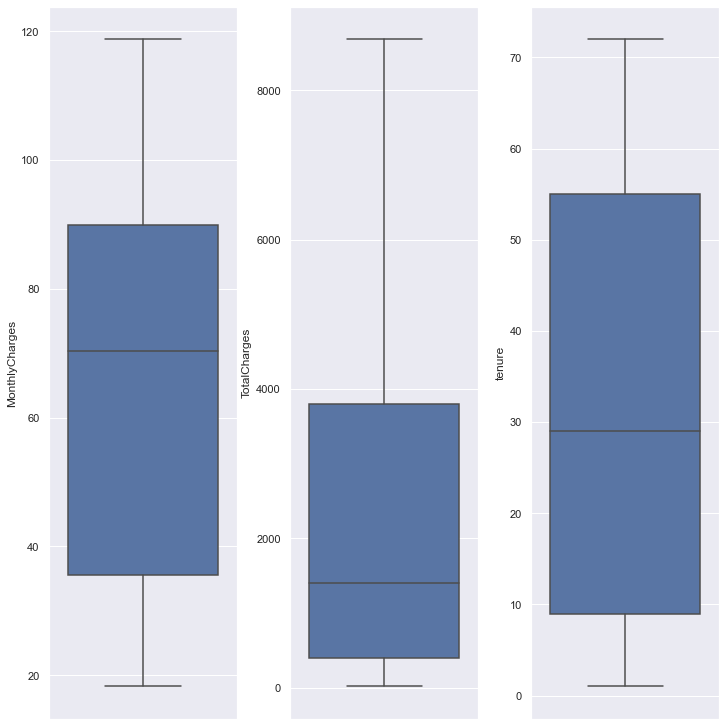

In [90]:
fig, axs = plt.subplots(1,3, figsize=(10, 10))
index = 0
axs = axs.flatten()
for c in num_cols:
    sns.boxplot(y=c, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0) # seems not outliers
fig.patch.set_facecolor('xkcd:white')

In [17]:
data['Churn'].value_counts() # imbalance

0    5163
1    1869
Name: Churn, dtype: int64

### Charts

In [143]:
y = data['Churn']
x = data.drop(columns=['Churn'])

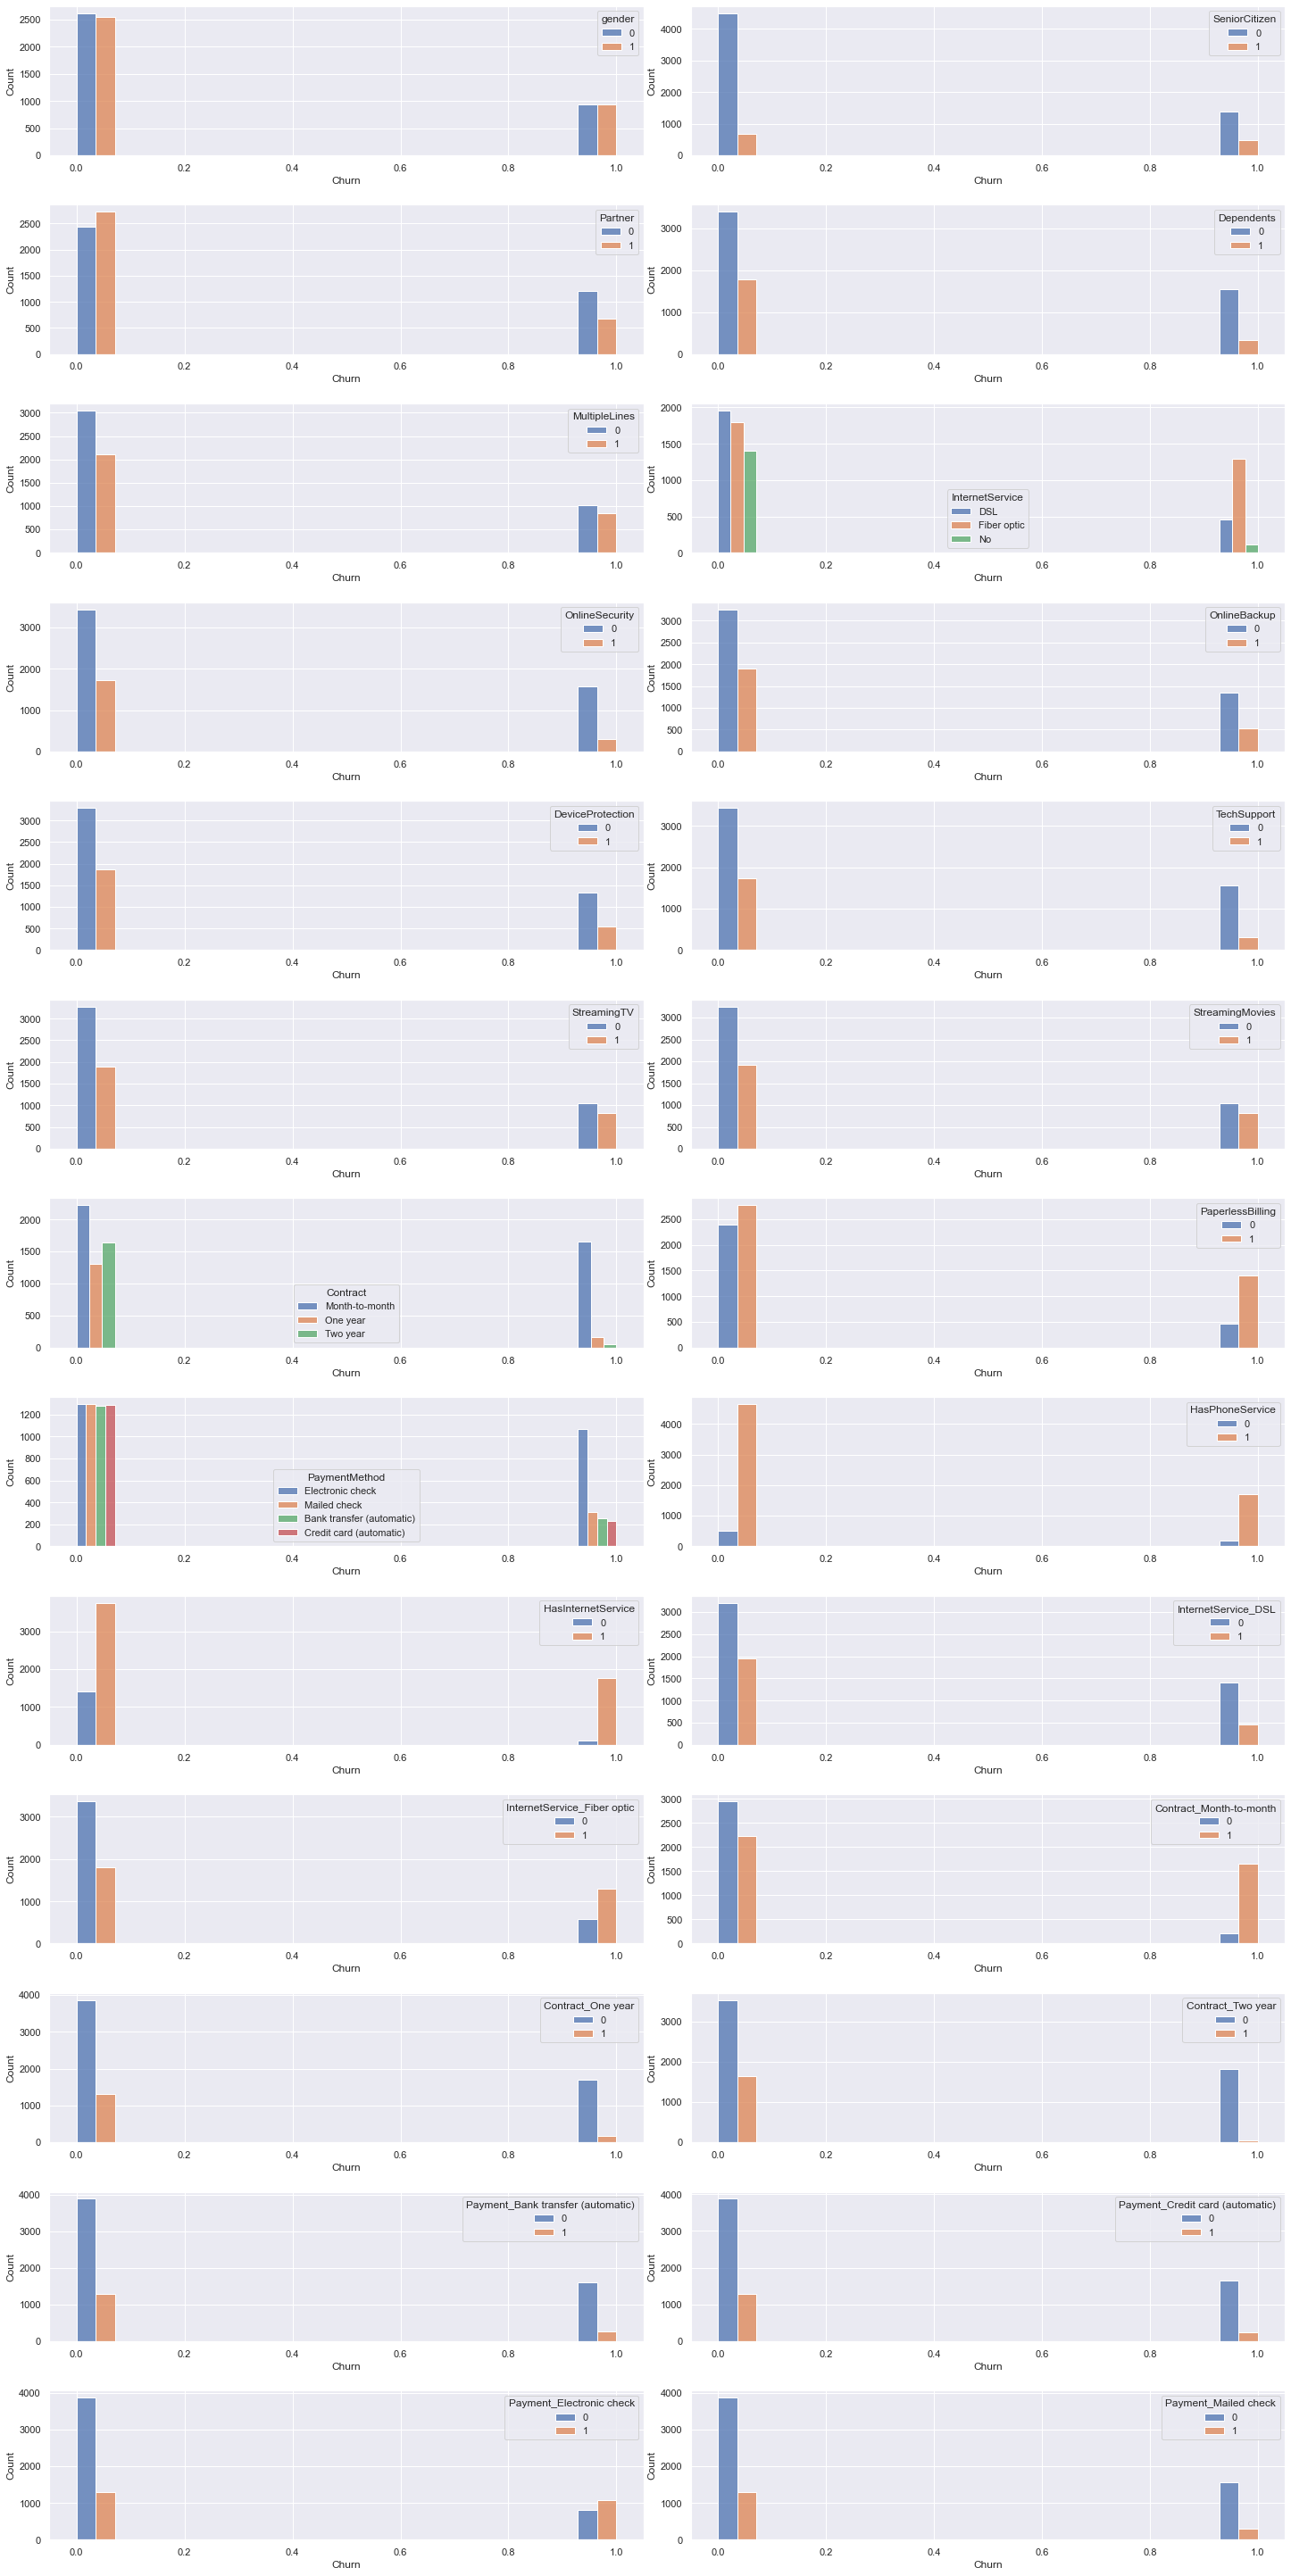

In [51]:
fig, axs = plt.subplots(13,2, figsize=(20,40)) #
index = 0
axs = axs.flatten()
for c in [c for c in x.columns if c not in num_cols]:
    sns.histplot(x=y, hue=c, data=data, ax=axs[index], multiple="dodge")
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
    fig.patch.set_facecolor('xkcd:white')
    index+=1

# SeniorCitizen seems less prone to churn
# No Partner
# No Dependents
# Fiber Optic
# Not two years or one years contract

In [ ]:
# What about new feature - TotalNumberOfServices => seems that subs with a lot of services could be less pron to churn

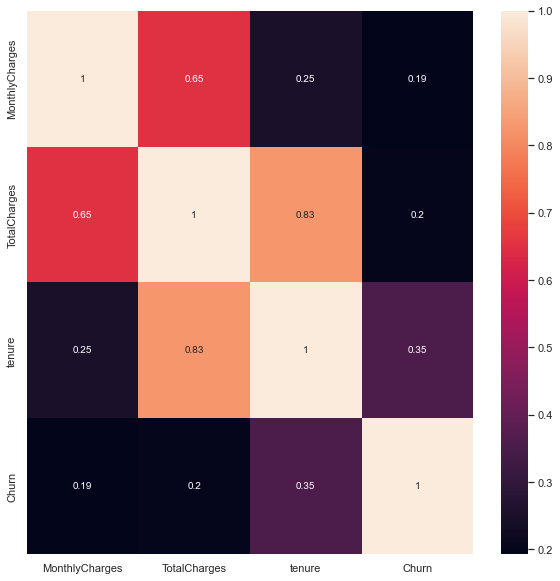

In [65]:
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(data[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']].corr().abs(), annot=True) # seems not very useful
fig.patch.set_facecolor('xkcd:white')
# not useful

## Feature selection

### Cat features

In [84]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2

In [ ]:
# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
# for cat target:
# for numeric vals -> ANOVA correlation coefficient (linear), Kendall’s rank coefficient (nonlinear).
# for cat vals -> Chi-Squared test (contingency tables), Mutual Information.

In [114]:
x_cat = x[cat_cols]

In [115]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_cat, y)

SelectKBest(k='all', score_func=<function chi2 at 0x0000019B356B4AF0>)

In [116]:
kbest_scores = pd.DataFrame()

In [117]:
kbest_scores['feature'] = x_cat.columns

In [118]:
kbest_scores['chi2'] = fs.scores_

In [119]:
fs2 = SelectKBest(score_func=mutual_info_classif, k='all')
fs2.fit(x_cat, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000019A7FBBB550>)

In [120]:
kbest_scores['mutual_info_classif'] = fs2.scores_

In [121]:
kbest_scores

,feature,chi2,mutual_info_classif
0,gender,0.259116,0.000000
1,SeniorCitizen,133.482766,0.020026
2,Partner,81.857769,0.013830
3,Dependents,131.271509,0.009943
4,MultipleLines,6.514651,0.001032
5,OnlineSecurity,147.165601,0.011041
6,OnlineBackup,31.209832,0.002502
7,DeviceProtection,20.216007,0.000000
8,TechSupport,135.439602,0.014464
9,StreamingTV,17.320615,0.003750


In [122]:
kbest_scores.nlargest(10, 'chi2')

,feature,chi2,mutual_info_classif
16,Contract_Month-to-month,516.714004,0.092118
18,Contract_Two year,486.223101,0.058966
21,Payment_Electronic check,424.113152,0.036338
15,InternetService_Fiber optic,372.082851,0.045751
17,Contract_One year,176.608724,0.026172
5,OnlineSecurity,147.165601,0.011041
8,TechSupport,135.439602,0.014464
1,SeniorCitizen,133.482766,0.020026
3,Dependents,131.271509,0.009943
11,PaperlessBilling,104.979224,0.019922


In [123]:
kbest_scores.nlargest(10, 'mutual_info_classif')

,feature,chi2,mutual_info_classif
16,Contract_Month-to-month,516.714004,0.092118
18,Contract_Two year,486.223101,0.058966
15,InternetService_Fiber optic,372.082851,0.045751
21,Payment_Electronic check,424.113152,0.036338
13,HasInternetService,78.723191,0.034988
17,Contract_One year,176.608724,0.026172
1,SeniorCitizen,133.482766,0.020026
11,PaperlessBilling,104.979224,0.019922
8,TechSupport,135.439602,0.014464
2,Partner,81.857769,0.013830


### Num featuers

In [124]:
from sklearn.feature_selection import f_classif

In [128]:
x_num = data[num_cols]

In [130]:
fc = SelectKBest(score_func=f_classif, k='all')
fc.fit(x_num, y)

SelectKBest(k='all')

In [132]:
num_scores = pd.DataFrame(index=x_num.columns, columns=['fc_score'], data= fc.scores_)

In [133]:
num_scores

,fc_score
MonthlyCharges,271.576990
TotalCharges,291.344862
tenure,1007.509431


In [ ]:
# https://medium.com/analytics-vidhya/kendall-rank-correlation-python-19524cb0e9a0

In [135]:
from scipy.stats import kendalltau

In [136]:
num_cols

['MonthlyCharges', 'TotalCharges', 'tenure']

In [140]:
kendal_corr = data[num_cols].join(y).corr(method='kendall')

In [141]:
kendal_corr

,MonthlyCharges,TotalCharges,tenure,Churn
MonthlyCharges,1.000000,0.459904,0.189785,0.150484
TotalCharges,0.459904,1.000000,0.734016,-0.189599
tenure,0.189785,0.734016,1.000000,-0.305119
Churn,0.150484,-0.189599,-0.305119,1.000000


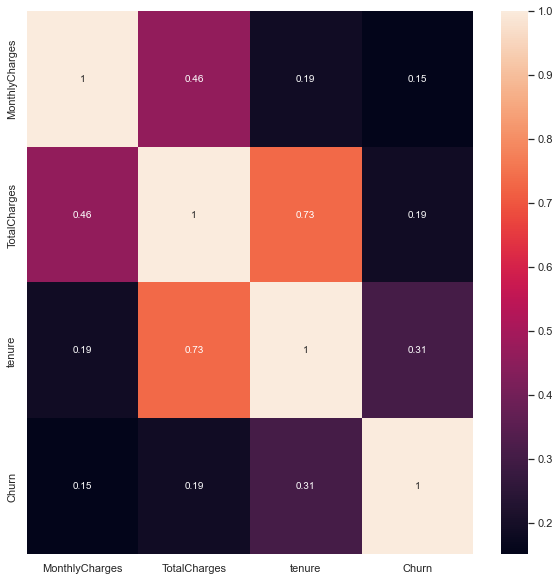

In [142]:
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(kendal_corr.abs(), annot=True) # seems not very useful
fig.patch.set_facecolor('xkcd:white')

## Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [181]:
X = x[[c for c in x.columns if x[c].dtype.kind != 'O']]

In [182]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

In [183]:
log_reg = LogisticRegression(max_iter=100)

In [184]:
log_reg.fit(X_scaled, y)

LogisticRegression()

In [188]:
log_reg_weights = pd.DataFrame(index=X.columns,
                               columns=['log_reg_weights'],
                               data= np.abs(log_reg.coef_[0]))

In [189]:
log_reg_weights

,log_reg_weights
gender,0.023478
SeniorCitizen,0.212820
Partner,0.007467
Dependents,0.154430
tenure,3.317207
MultipleLines,0.261414
OnlineSecurity,0.385883
OnlineBackup,0.150952
DeviceProtection,0.031241
TechSupport,0.358113


## Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
model_rf = RandomForestClassifier(n_estimators=1000 ,
                                  oob_score = True,
                                  n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)

In [195]:
model_rf.fit(X, y)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [197]:
rf_feat_importance = pd.DataFrame(index=X.columns,
                               columns=['rf_feat_importance'],
                               data= np.abs(model_rf.feature_importances_))

In [198]:
rf_feat_importance

,rf_feat_importance
gender,0.001372
SeniorCitizen,0.007231
Partner,0.003746
Dependents,0.004717
tenure,0.175038
MultipleLines,0.005695
OnlineSecurity,0.019879
OnlineBackup,0.004682
DeviceProtection,0.001864
TechSupport,0.016151


## SVM

In [199]:
from sklearn.svm import SVC

In [200]:
svm = SVC(kernel='linear')
svm.fit(X_scaled,y)

SVC(kernel='linear')

In [203]:
svm_feat_importance = pd.DataFrame(index=X.columns,
                                  columns=['svm_feat_importance'],
                                  data= np.abs(svm.coef_[0]))

In [204]:
svm_feat_importance

,svm_feat_importance
gender,0.041915
SeniorCitizen,0.186107
Partner,0.030181
Dependents,0.091645
tenure,1.348374
MultipleLines,0.230193
OnlineSecurity,0.245192
OnlineBackup,0.075209
DeviceProtection,0.017710
TechSupport,0.272359


In [ ]:
# TODO: merge all scores together
# TODO: try that 'services_count' feature